# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 17616 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)


  0% (    1 of 17616) |                   | Elapsed Time: 0:00:04 ETA:  21:01:43

  0% (   62 of 17616) |                    | Elapsed Time: 0:00:05 ETA:  0:04:45

  1% (  187 of 17616) |                    | Elapsed Time: 0:00:06 ETA:  0:03:04

  1% (  221 of 17616) |                    | Elapsed Time: 0:00:07 ETA:  0:04:06

  1% (  294 of 17616) |                    | Elapsed Time: 0:00:08 ETA:  0:04:02

  2% (  359 of 17616) |                    | Elapsed Time: 0:00:09 ETA:  0:04:05

  2% (  441 of 17616) |                    | Elapsed Time: 0:00:10 ETA:  0:03:59

  3% (  560 of 17616) |                    | Elapsed Time: 0:00:11 ETA:  0:03:37

  3% (  661 of 17616) |                    | Elapsed Time: 0:00:12 ETA:  0:03:26

  4% (  775 of 17616) |                    | Elapsed Time: 0:00:13 ETA:  0:03:09

  5% (  881 of 17616) |#                   | Elapsed Time: 0:00:14 ETA:  0:03:11

  5% (  994 of 17616) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:45

  6% ( 1101 of 17616) |#                   | Elapsed Time: 0:00:16 ETA:  0:02:33

  6% ( 1226 of 17616) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:21

  7% ( 1322 of 17616) |#                   | Elapsed Time: 0:00:18 ETA:  0:02:16

  8% ( 1435 of 17616) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:16

  8% ( 1542 of 17616) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:14

  9% ( 1653 of 17616) |#                   | Elapsed Time: 0:00:21 ETA:  0:02:14

 10% ( 1762 of 17616) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:14

 10% ( 1869 of 17616) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:14

 11% ( 1982 of 17616) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:19

 11% ( 2087 of 17616) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:16

 12% ( 2202 of 17616) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:14

 13% ( 2299 of 17616) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:16

 13% ( 2423 of 17616) |##                  | Elapsed Time: 0:00:28 ETA:  0:02:15

 14% ( 2534 of 17616) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:14

 15% ( 2643 of 17616) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:16

 15% ( 2738 of 17616) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:18

 16% ( 2863 of 17616) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:16

 16% ( 2971 of 17616) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:11

 17% ( 3053 of 17616) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:18

 17% ( 3083 of 17616) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:20

 18% ( 3184 of 17616) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:21

 18% ( 3303 of 17616) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:12

 19% ( 3405 of 17616) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:12

 19% ( 3472 of 17616) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:17

 20% ( 3524 of 17616) |####                | Elapsed Time: 0:00:39 ETA:  0:02:22

 20% ( 3641 of 17616) |####                | Elapsed Time: 0:00:40 ETA:  0:02:16

 21% ( 3744 of 17616) |####                | Elapsed Time: 0:00:41 ETA:  0:02:14

 21% ( 3855 of 17616) |####                | Elapsed Time: 0:00:42 ETA:  0:02:09

 22% ( 3964 of 17616) |####                | Elapsed Time: 0:00:43 ETA:  0:02:06

 22% ( 4045 of 17616) |####                | Elapsed Time: 0:00:44 ETA:  0:02:15

 23% ( 4147 of 17616) |####                | Elapsed Time: 0:00:45 ETA:  0:02:14

 23% ( 4184 of 17616) |####                | Elapsed Time: 0:00:45 ETA:  0:02:07

 24% ( 4285 of 17616) |####                | Elapsed Time: 0:00:46 ETA:  0:02:07

 25% ( 4404 of 17616) |#####               | Elapsed Time: 0:00:48 ETA:  0:02:04

 25% ( 4485 of 17616) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:08

 26% ( 4585 of 17616) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:10

 26% ( 4625 of 17616) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:10

 26% ( 4729 of 17616) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:03

 27% ( 4845 of 17616) |#####               | Elapsed Time: 0:00:52 ETA:  0:01:58

 28% ( 4955 of 17616) |#####               | Elapsed Time: 0:00:53 ETA:  0:01:55

 28% ( 5065 of 17616) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:56

 29% ( 5189 of 17616) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:50

 30% ( 5285 of 17616) |######              | Elapsed Time: 0:00:56 ETA:  0:01:44

 30% ( 5418 of 17616) |######              | Elapsed Time: 0:00:57 ETA:  0:01:39

 31% ( 5505 of 17616) |######              | Elapsed Time: 0:00:58 ETA:  0:01:43

 31% ( 5626 of 17616) |######              | Elapsed Time: 0:00:59 ETA:  0:01:39

 32% ( 5726 of 17616) |######              | Elapsed Time: 0:01:00 ETA:  0:01:36

 32% ( 5798 of 17616) |######              | Elapsed Time: 0:01:01 ETA:  0:01:45

 33% ( 5913 of 17616) |######              | Elapsed Time: 0:01:02 ETA:  0:01:47

 33% ( 5946 of 17616) |######              | Elapsed Time: 0:01:02 ETA:  0:01:44

 34% ( 6053 of 17616) |######              | Elapsed Time: 0:01:03 ETA:  0:01:43

 35% ( 6166 of 17616) |#######             | Elapsed Time: 0:01:04 ETA:  0:01:44

 35% ( 6272 of 17616) |#######             | Elapsed Time: 0:01:05 ETA:  0:01:38

 36% ( 6386 of 17616) |#######             | Elapsed Time: 0:01:06 ETA:  0:01:35

 36% ( 6478 of 17616) |#######             | Elapsed Time: 0:01:07 ETA:  0:01:39

 37% ( 6606 of 17616) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:32

 38% ( 6732 of 17616) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:28

 38% ( 6827 of 17616) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:24

 39% ( 6955 of 17616) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:20

 40% ( 7047 of 17616) |########            | Elapsed Time: 0:01:12 ETA:  0:01:19

 40% ( 7181 of 17616) |########            | Elapsed Time: 0:01:13 ETA:  0:01:13

 41% ( 7267 of 17616) |########            | Elapsed Time: 0:01:13 ETA:  0:01:13

 41% ( 7386 of 17616) |########            | Elapsed Time: 0:01:14 ETA:  0:01:08

 42% ( 7487 of 17616) |########            | Elapsed Time: 0:01:15 ETA:  0:01:05

 43% ( 7599 of 17616) |########            | Elapsed Time: 0:01:16 ETA:  0:01:06

 43% ( 7707 of 17616) |########            | Elapsed Time: 0:01:17 ETA:  0:01:06

 44% ( 7819 of 17616) |########            | Elapsed Time: 0:01:18 ETA:  0:01:07

 45% ( 7928 of 17616) |#########           | Elapsed Time: 0:01:19 ETA:  0:01:07

 45% ( 8052 of 17616) |#########           | Elapsed Time: 0:01:20 ETA:  0:01:07

 46% ( 8148 of 17616) |#########           | Elapsed Time: 0:01:21 ETA:  0:01:08

 46% ( 8268 of 17616) |#########           | Elapsed Time: 0:01:22 ETA:  0:01:06

 47% ( 8368 of 17616) |#########           | Elapsed Time: 0:01:23 ETA:  0:01:05

 48% ( 8490 of 17616) |#########           | Elapsed Time: 0:01:24 ETA:  0:01:04

 48% ( 8588 of 17616) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:02

 49% ( 8717 of 17616) |#########           | Elapsed Time: 0:01:26 ETA:  0:00:59

 50% ( 8808 of 17616) |##########          | Elapsed Time: 0:01:26 ETA:  0:00:58

 50% ( 8856 of 17616) |##########          | Elapsed Time: 0:01:27 ETA:  0:01:09

 50% ( 8970 of 17616) |##########          | Elapsed Time: 0:01:28 ETA:  0:01:09

 51% ( 9029 of 17616) |##########          | Elapsed Time: 0:01:29 ETA:  0:01:10

 51% ( 9144 of 17616) |##########          | Elapsed Time: 0:01:30 ETA:  0:01:10

 52% ( 9249 of 17616) |##########          | Elapsed Time: 0:01:31 ETA:  0:01:15

 53% ( 9368 of 17616) |##########          | Elapsed Time: 0:01:32 ETA:  0:01:14

 53% ( 9469 of 17616) |##########          | Elapsed Time: 0:01:33 ETA:  0:01:15

 54% ( 9591 of 17616) |##########          | Elapsed Time: 0:01:34 ETA:  0:01:12

 55% ( 9689 of 17616) |###########         | Elapsed Time: 0:01:35 ETA:  0:00:56

 55% ( 9804 of 17616) |###########         | Elapsed Time: 0:01:36 ETA:  0:00:55

 56% ( 9909 of 17616) |###########         | Elapsed Time: 0:01:36 ETA:  0:00:53

 56% (10026 of 17616) |###########         | Elapsed Time: 0:01:37 ETA:  0:00:52

 57% (10130 of 17616) |###########         | Elapsed Time: 0:01:38 ETA:  0:00:47

 58% (10256 of 17616) |###########         | Elapsed Time: 0:01:39 ETA:  0:00:46

 58% (10350 of 17616) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:44

 59% (10470 of 17616) |###########         | Elapsed Time: 0:01:41 ETA:  0:00:44

 60% (10570 of 17616) |############        | Elapsed Time: 0:01:42 ETA:  0:00:45

 60% (10689 of 17616) |############        | Elapsed Time: 0:01:43 ETA:  0:00:44

 61% (10790 of 17616) |############        | Elapsed Time: 0:01:44 ETA:  0:00:41

 61% (10895 of 17616) |############        | Elapsed Time: 0:01:45 ETA:  0:00:43

 62% (11010 of 17616) |############        | Elapsed Time: 0:01:46 ETA:  0:00:42

 63% (11118 of 17616) |############        | Elapsed Time: 0:01:47 ETA:  0:00:43

 63% (11231 of 17616) |############        | Elapsed Time: 0:01:48 ETA:  0:00:45

 64% (11349 of 17616) |############        | Elapsed Time: 0:01:49 ETA:  0:00:45

 65% (11451 of 17616) |#############       | Elapsed Time: 0:01:50 ETA:  0:00:42

 65% (11575 of 17616) |#############       | Elapsed Time: 0:01:51 ETA:  0:00:40

 66% (11671 of 17616) |#############       | Elapsed Time: 0:01:51 ETA:  0:00:40

 66% (11786 of 17616) |#############       | Elapsed Time: 0:01:52 ETA:  0:00:37

 67% (11891 of 17616) |#############       | Elapsed Time: 0:01:53 ETA:  0:00:37

 68% (12006 of 17616) |#############       | Elapsed Time: 0:01:54 ETA:  0:00:34

 68% (12111 of 17616) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:33

 69% (12236 of 17616) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:31

 70% (12332 of 17616) |##############      | Elapsed Time: 0:01:57 ETA:  0:00:30

 70% (12436 of 17616) |##############      | Elapsed Time: 0:01:58 ETA:  0:00:33

 70% (12477 of 17616) |##############      | Elapsed Time: 0:01:59 ETA:  0:00:46

 71% (12552 of 17616) |##############      | Elapsed Time: 0:02:00 ETA:  0:00:49

 71% (12666 of 17616) |##############      | Elapsed Time: 0:02:01 ETA:  0:00:48

 72% (12772 of 17616) |##############      | Elapsed Time: 0:02:02 ETA:  0:00:46

 73% (12889 of 17616) |##############      | Elapsed Time: 0:02:03 ETA:  0:00:45

 73% (12992 of 17616) |##############      | Elapsed Time: 0:02:04 ETA:  0:00:44

 74% (13112 of 17616) |##############      | Elapsed Time: 0:02:05 ETA:  0:00:44

 75% (13212 of 17616) |###############     | Elapsed Time: 0:02:05 ETA:  0:00:41

 75% (13325 of 17616) |###############     | Elapsed Time: 0:02:06 ETA:  0:00:38

 76% (13433 of 17616) |###############     | Elapsed Time: 0:02:07 ETA:  0:00:24

 76% (13548 of 17616) |###############     | Elapsed Time: 0:02:08 ETA:  0:00:21

 77% (13653 of 17616) |###############     | Elapsed Time: 0:02:09 ETA:  0:00:18

 78% (13780 of 17616) |###############     | Elapsed Time: 0:02:10 ETA:  0:00:16

 78% (13873 of 17616) |###############     | Elapsed Time: 0:02:11 ETA:  0:00:15

 79% (13994 of 17616) |###############     | Elapsed Time: 0:02:12 ETA:  0:00:14

 80% (14093 of 17616) |################    | Elapsed Time: 0:02:13 ETA:  0:00:14

 80% (14202 of 17616) |################    | Elapsed Time: 0:02:14 ETA:  0:00:15

 81% (14313 of 17616) |################    | Elapsed Time: 0:02:15 ETA:  0:00:13

 81% (14428 of 17616) |################    | Elapsed Time: 0:02:16 ETA:  0:00:12

 82% (14534 of 17616) |################    | Elapsed Time: 0:02:17 ETA:  0:00:11

 83% (14659 of 17616) |################    | Elapsed Time: 0:02:18 ETA:  0:00:11

 83% (14754 of 17616) |################    | Elapsed Time: 0:02:19 ETA:  0:00:11

 84% (14874 of 17616) |################    | Elapsed Time: 0:02:20 ETA:  0:00:10

 85% (14974 of 17616) |#################   | Elapsed Time: 0:02:20 ETA:  0:00:09

 85% (15083 of 17616) |#################   | Elapsed Time: 0:02:21 ETA:  0:00:09

 86% (15194 of 17616) |#################   | Elapsed Time: 0:02:22 ETA:  0:00:07

 86% (15308 of 17616) |#################   | Elapsed Time: 0:02:23 ETA:  0:00:07

 87% (15414 of 17616) |#################   | Elapsed Time: 0:02:24 ETA:  0:00:07

 88% (15537 of 17616) |#################   | Elapsed Time: 0:02:25 ETA:  0:00:05

 88% (15635 of 17616) |#################   | Elapsed Time: 0:02:26 ETA:  0:00:04

 89% (15750 of 17616) |#################   | Elapsed Time: 0:02:27 ETA:  0:00:03

 90% (15855 of 17616) |##################  | Elapsed Time: 0:02:28 ETA:  0:00:03

 90% (15969 of 17616) |##################  | Elapsed Time: 0:02:29 ETA:  0:00:04

 91% (16075 of 17616) |##################  | Elapsed Time: 0:02:30 ETA:  0:00:01

 91% (16191 of 17616) |##################  | Elapsed Time: 0:02:31 ETA:  0:00:00

 92% (16295 of 17616) |##################  | Elapsed Time: 0:02:32 ETA:  0:00:00

 93% (16414 of 17616) |##################  | Elapsed Time: 0:02:33 ETA:  0:00:00

 93% (16515 of 17616) |##################  | Elapsed Time: 0:02:34 ETA:  0:00:00

 94% (16614 of 17616) |##################  | Elapsed Time: 0:02:35 ETA:  0:00:00

 95% (16736 of 17616) |################### | Elapsed Time: 0:02:36 ETA:  0:00:00

 95% (16828 of 17616) |################### | Elapsed Time: 0:02:37 ETA:  0:00:07

 96% (16933 of 17616) |################### | Elapsed Time: 0:02:38 ETA:  0:00:07

 96% (16956 of 17616) |################### | Elapsed Time: 0:02:38 ETA:  0:00:10

 96% (17065 of 17616) |################### | Elapsed Time: 0:02:39 ETA:  0:00:11

 97% (17176 of 17616) |################### | Elapsed Time: 0:02:40 ETA:  0:00:10

 98% (17288 of 17616) |################### | Elapsed Time: 0:02:41 ETA:  0:00:10

 98% (17396 of 17616) |################### | Elapsed Time: 0:02:42 ETA:  0:00:10

 99% (17509 of 17616) |################### | Elapsed Time: 0:02:43 ETA:  0:00:07

100% (17616 of 17616) |####################| Elapsed Time: 0:02:44 Time: 0:02:44


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

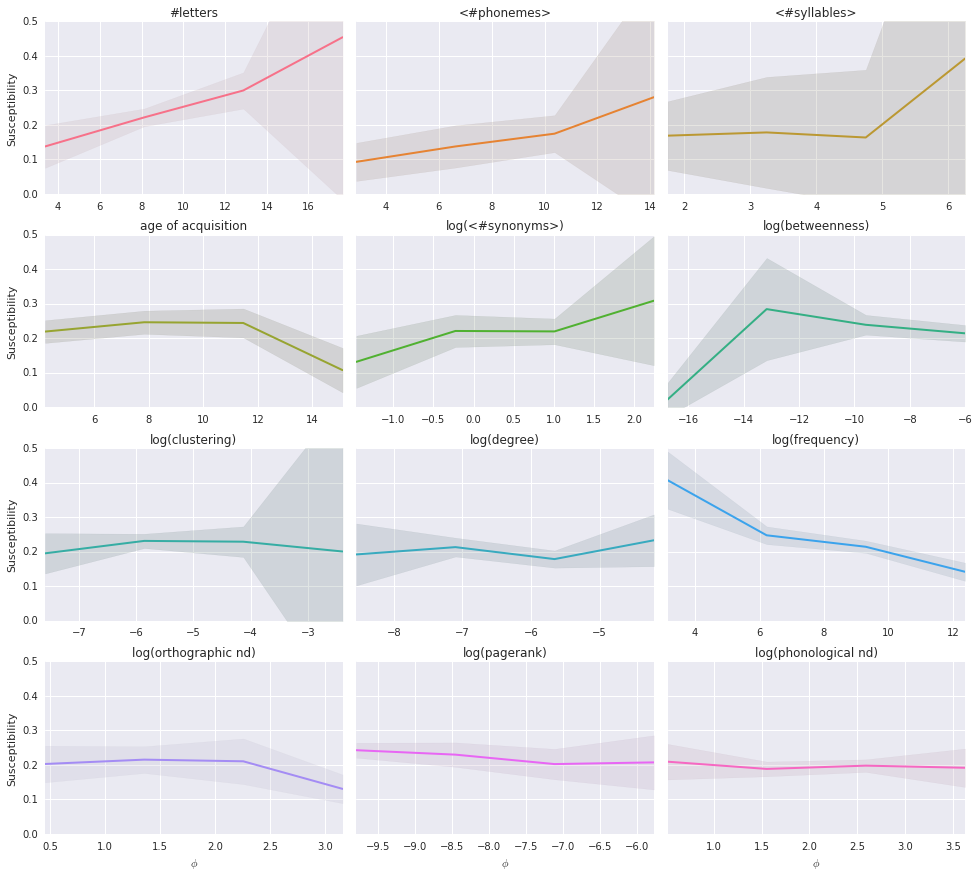

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

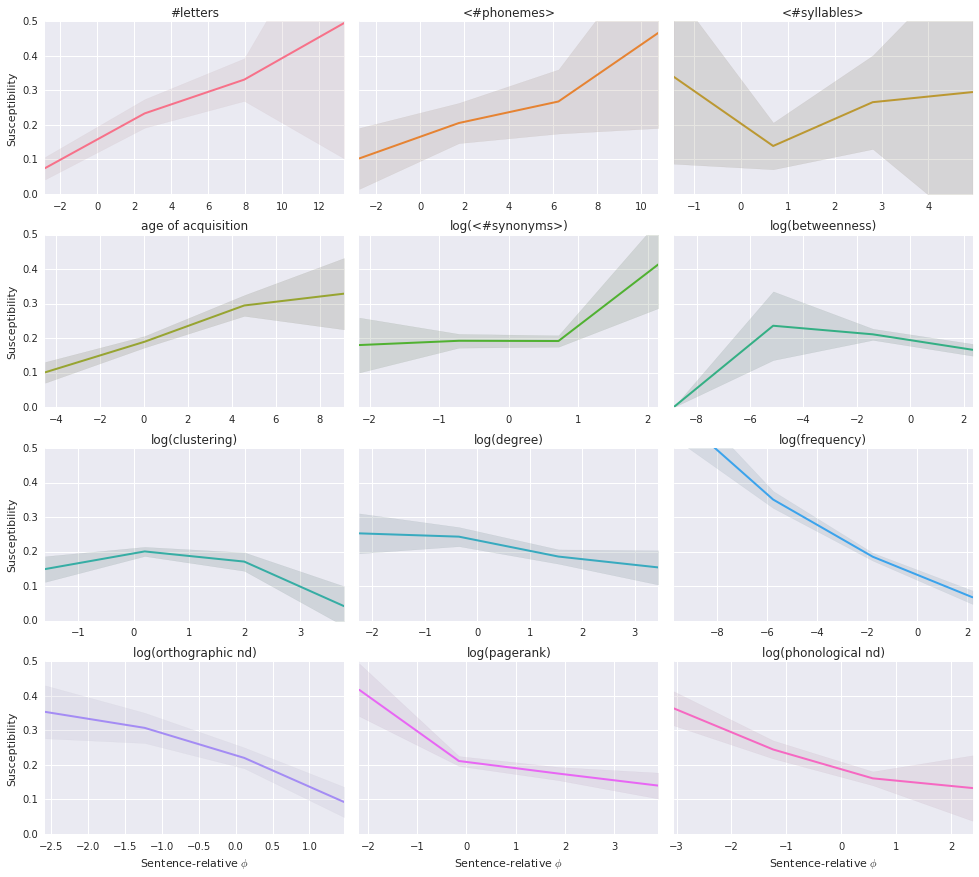

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

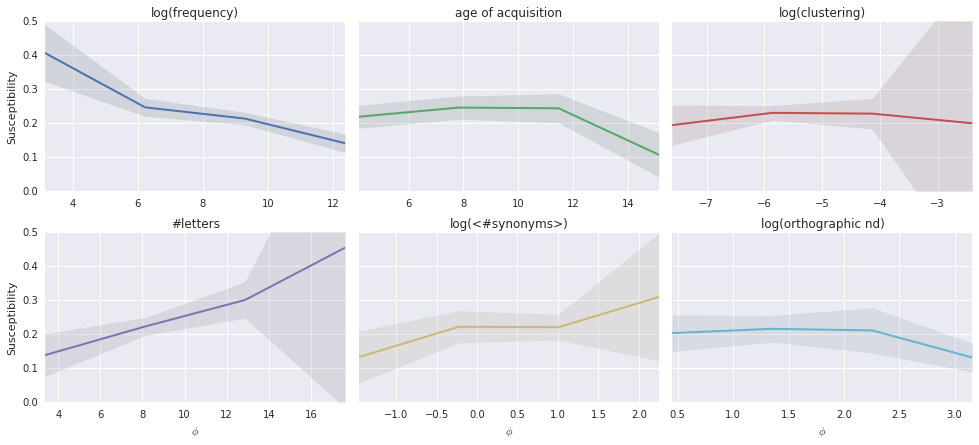

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

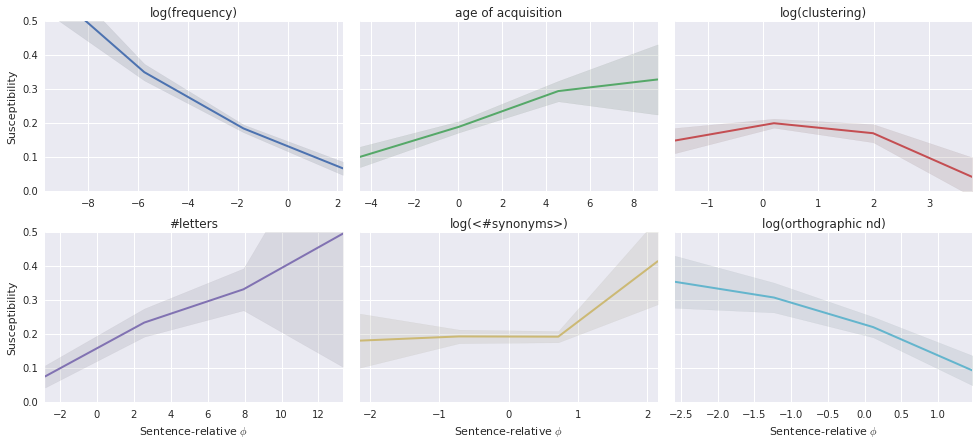

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

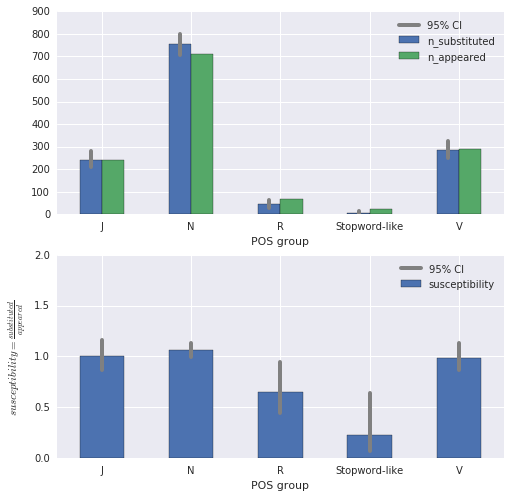

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

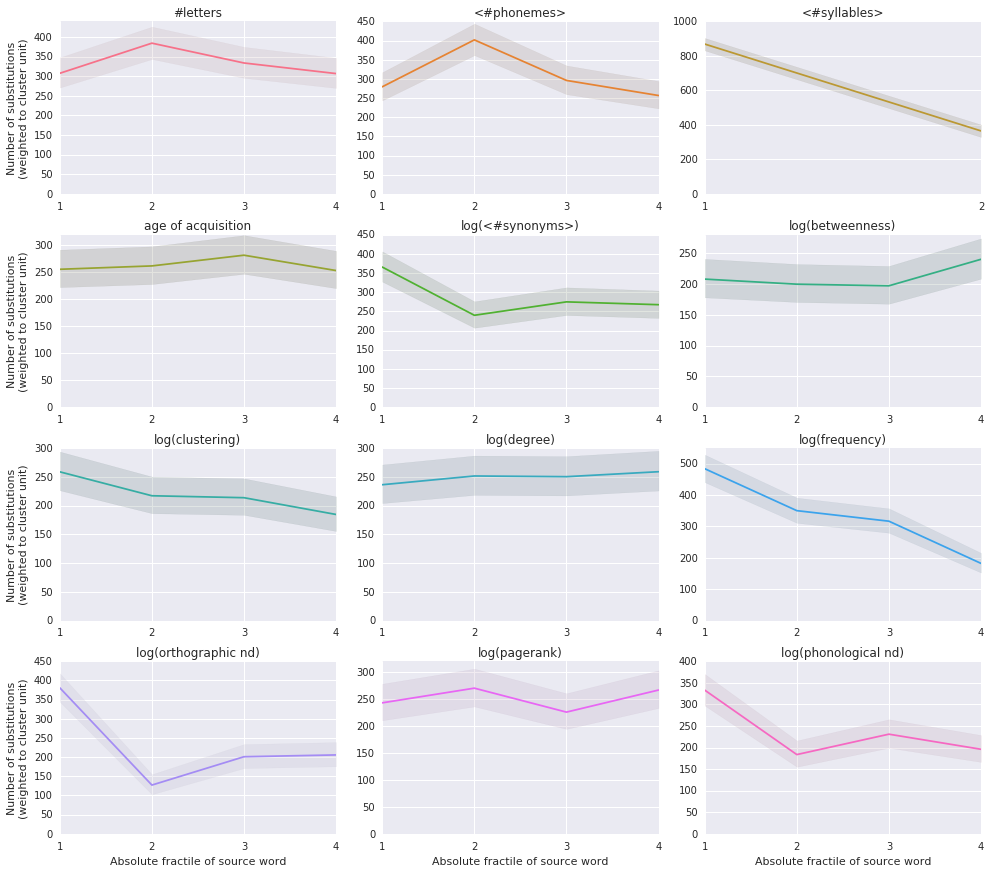

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

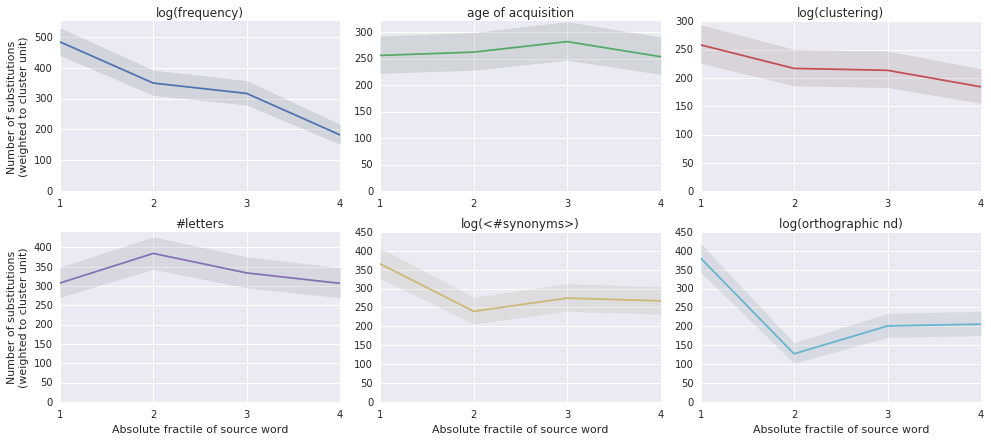

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (  108 of 17616) |                    | Elapsed Time: 0:00:01 ETA:  0:02:43

  1% (  221 of 17616) |                    | Elapsed Time: 0:00:02 ETA:  0:02:38

  1% (  320 of 17616) |                    | Elapsed Time: 0:00:03 ETA:  0:02:45

  2% (  441 of 17616) |                    | Elapsed Time: 0:00:04 ETA:  0:02:44

  3% (  550 of 17616) |                    | Elapsed Time: 0:00:05 ETA:  0:02:41

  3% (  661 of 17616) |                    | Elapsed Time: 0:00:06 ETA:  0:02:43

  4% (  792 of 17616) |                    | Elapsed Time: 0:00:07 ETA:  0:02:35

  5% (  881 of 17616) |#                   | Elapsed Time: 0:00:08 ETA:  0:02:34

  5% (  969 of 17616) |#                   | Elapsed Time: 0:00:09 ETA:  0:02:37

  5% ( 1054 of 17616) |#                   | Elapsed Time: 0:00:10 ETA:  0:02:39

  6% ( 1101 of 17616) |#                   | Elapsed Time: 0:00:10 ETA:  0:02:42

  6% ( 1186 of 17616) |#                   | Elapsed Time: 0:00:11 ETA:  0:02:45

  7% ( 1271 of 17616) |#                   | Elapsed Time: 0:00:12 ETA:  0:02:50

  7% ( 1322 of 17616) |#                   | Elapsed Time: 0:00:13 ETA:  0:02:52

  8% ( 1414 of 17616) |#                   | Elapsed Time: 0:00:14 ETA:  0:02:52

  8% ( 1510 of 17616) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:00

  8% ( 1542 of 17616) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:05

  9% ( 1640 of 17616) |#                   | Elapsed Time: 0:00:16 ETA:  0:03:01

  9% ( 1735 of 17616) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:57

 10% ( 1762 of 17616) |##                  | Elapsed Time: 0:00:17 ETA:  0:02:55

 10% ( 1859 of 17616) |##                  | Elapsed Time: 0:00:18 ETA:  0:02:51

 11% ( 1956 of 17616) |##                  | Elapsed Time: 0:00:19 ETA:  0:02:46

 11% ( 1982 of 17616) |##                  | Elapsed Time: 0:00:20 ETA:  0:02:45

 11% ( 2083 of 17616) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:41

 12% ( 2202 of 17616) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:38

 13% ( 2302 of 17616) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:36

 13% ( 2383 of 17616) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:40

 13% ( 2423 of 17616) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:41

 14% ( 2504 of 17616) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:45

 14% ( 2584 of 17616) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:49

 15% ( 2643 of 17616) |###                 | Elapsed Time: 0:00:27 ETA:  0:02:45

 15% ( 2744 of 17616) |###                 | Elapsed Time: 0:00:28 ETA:  0:02:44

 16% ( 2832 of 17616) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:47

 16% ( 2863 of 17616) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:48

 16% ( 2953 of 17616) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:50

 17% ( 3032 of 17616) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:49

 17% ( 3083 of 17616) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:45

 18% ( 3181 of 17616) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:39

 18% ( 3258 of 17616) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:39

 18% ( 3303 of 17616) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:43

 19% ( 3405 of 17616) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:42

 20% ( 3524 of 17616) |####                | Elapsed Time: 0:00:37 ETA:  0:02:36

 20% ( 3627 of 17616) |####                | Elapsed Time: 0:00:38 ETA:  0:02:32

 21% ( 3744 of 17616) |####                | Elapsed Time: 0:00:39 ETA:  0:02:20

 21% ( 3856 of 17616) |####                | Elapsed Time: 0:00:40 ETA:  0:02:16

 22% ( 3964 of 17616) |####                | Elapsed Time: 0:00:41 ETA:  0:02:12

 23% ( 4094 of 17616) |####                | Elapsed Time: 0:00:42 ETA:  0:02:00

 23% ( 4184 of 17616) |####                | Elapsed Time: 0:00:43 ETA:  0:02:00

 24% ( 4280 of 17616) |####                | Elapsed Time: 0:00:44 ETA:  0:02:00

 24% ( 4380 of 17616) |####                | Elapsed Time: 0:00:45 ETA:  0:02:00

 25% ( 4404 of 17616) |#####               | Elapsed Time: 0:00:45 ETA:  0:02:00

 25% ( 4492 of 17616) |#####               | Elapsed Time: 0:00:46 ETA:  0:02:06

 26% ( 4593 of 17616) |#####               | Elapsed Time: 0:00:47 ETA:  0:02:07

 26% ( 4625 of 17616) |#####               | Elapsed Time: 0:00:47 ETA:  0:02:09

 26% ( 4730 of 17616) |#####               | Elapsed Time: 0:00:48 ETA:  0:02:15

 27% ( 4823 of 17616) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:11

 27% ( 4845 of 17616) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:11

 28% ( 4939 of 17616) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:10

 28% ( 5028 of 17616) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:12

 28% ( 5065 of 17616) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:12

 29% ( 5157 of 17616) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:10

 29% ( 5234 of 17616) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:38

 30% ( 5285 of 17616) |######              | Elapsed Time: 0:00:55 ETA:  0:02:35

 31% ( 5472 of 17616) |######              | Elapsed Time: 0:00:56 ETA:  0:02:11

 31% ( 5505 of 17616) |######              | Elapsed Time: 0:00:57 ETA:  0:02:10

 31% ( 5600 of 17616) |######              | Elapsed Time: 0:00:58 ETA:  0:02:09

 32% ( 5726 of 17616) |######              | Elapsed Time: 0:00:59 ETA:  0:02:00

 33% ( 5839 of 17616) |######              | Elapsed Time: 0:01:00 ETA:  0:01:55

 33% ( 5946 of 17616) |######              | Elapsed Time: 0:01:01 ETA:  0:01:25

 34% ( 6032 of 17616) |######              | Elapsed Time: 0:01:02 ETA:  0:01:31

 34% ( 6136 of 17616) |######              | Elapsed Time: 0:01:03 ETA:  0:01:49

 35% ( 6166 of 17616) |#######             | Elapsed Time: 0:01:03 ETA:  0:01:48

 35% ( 6259 of 17616) |#######             | Elapsed Time: 0:01:04 ETA:  0:01:47

 36% ( 6386 of 17616) |#######             | Elapsed Time: 0:01:05 ETA:  0:01:48

 36% ( 6501 of 17616) |#######             | Elapsed Time: 0:01:06 ETA:  0:01:46

 37% ( 6606 of 17616) |#######             | Elapsed Time: 0:01:07 ETA:  0:01:47

 38% ( 6713 of 17616) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:40

 38% ( 6806 of 17616) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:42

 38% ( 6827 of 17616) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:43

 39% ( 6943 of 17616) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:36

 40% ( 7047 of 17616) |########            | Elapsed Time: 0:01:11 ETA:  0:01:30

 40% ( 7164 of 17616) |########            | Elapsed Time: 0:01:12 ETA:  0:01:30

 41% ( 7267 of 17616) |########            | Elapsed Time: 0:01:13 ETA:  0:01:31

 41% ( 7380 of 17616) |########            | Elapsed Time: 0:01:14 ETA:  0:01:27

 42% ( 7487 of 17616) |########            | Elapsed Time: 0:01:15 ETA:  0:01:24

 43% ( 7596 of 17616) |########            | Elapsed Time: 0:01:16 ETA:  0:01:23

 43% ( 7707 of 17616) |########            | Elapsed Time: 0:01:17 ETA:  0:01:18

 44% ( 7804 of 17616) |########            | Elapsed Time: 0:01:18 ETA:  0:01:20

 45% ( 7928 of 17616) |#########           | Elapsed Time: 0:01:19 ETA:  0:01:17

 45% ( 8035 of 17616) |#########           | Elapsed Time: 0:01:20 ETA:  0:01:18

 46% ( 8148 of 17616) |#########           | Elapsed Time: 0:01:21 ETA:  0:01:14

 46% ( 8266 of 17616) |#########           | Elapsed Time: 0:01:22 ETA:  0:01:12

 47% ( 8368 of 17616) |#########           | Elapsed Time: 0:01:23 ETA:  0:01:15

 48% ( 8484 of 17616) |#########           | Elapsed Time: 0:01:24 ETA:  0:01:12

 48% ( 8588 of 17616) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:13

 49% ( 8681 of 17616) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:12

 49% ( 8781 of 17616) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:17

 50% ( 8808 of 17616) |##########          | Elapsed Time: 0:01:28 ETA:  0:01:18

 50% ( 8918 of 17616) |##########          | Elapsed Time: 0:01:29 ETA:  0:01:19

 51% ( 9029 of 17616) |##########          | Elapsed Time: 0:01:30 ETA:  0:01:21

 51% ( 9114 of 17616) |##########          | Elapsed Time: 0:01:31 ETA:  0:01:28

 52% ( 9217 of 17616) |##########          | Elapsed Time: 0:01:32 ETA:  0:01:26

 52% ( 9249 of 17616) |##########          | Elapsed Time: 0:01:32 ETA:  0:01:23

 53% ( 9352 of 17616) |##########          | Elapsed Time: 0:01:33 ETA:  0:01:20

 53% ( 9469 of 17616) |##########          | Elapsed Time: 0:01:34 ETA:  0:01:16

 54% ( 9570 of 17616) |##########          | Elapsed Time: 0:01:35 ETA:  0:01:17

 54% ( 9663 of 17616) |##########          | Elapsed Time: 0:01:36 ETA:  0:01:19

 55% ( 9689 of 17616) |###########         | Elapsed Time: 0:01:36 ETA:  0:01:18

 55% ( 9795 of 17616) |###########         | Elapsed Time: 0:01:37 ETA:  0:01:12

 56% ( 9909 of 17616) |###########         | Elapsed Time: 0:01:38 ETA:  0:01:14

 56% (10018 of 17616) |###########         | Elapsed Time: 0:01:39 ETA:  0:01:11

 57% (10130 of 17616) |###########         | Elapsed Time: 0:01:40 ETA:  0:01:09

 58% (10241 of 17616) |###########         | Elapsed Time: 0:01:41 ETA:  0:01:06

 58% (10350 of 17616) |###########         | Elapsed Time: 0:01:43 ETA:  0:01:07

 59% (10463 of 17616) |###########         | Elapsed Time: 0:01:44 ETA:  0:01:04

 60% (10570 of 17616) |############        | Elapsed Time: 0:01:44 ETA:  0:00:58

 60% (10681 of 17616) |############        | Elapsed Time: 0:01:45 ETA:  0:00:56

 61% (10790 of 17616) |############        | Elapsed Time: 0:01:46 ETA:  0:00:54

 61% (10886 of 17616) |############        | Elapsed Time: 0:01:47 ETA:  0:00:55

 62% (10990 of 17616) |############        | Elapsed Time: 0:01:48 ETA:  0:00:55

 62% (11010 of 17616) |############        | Elapsed Time: 0:01:49 ETA:  0:00:56

 63% (11111 of 17616) |############        | Elapsed Time: 0:01:50 ETA:  0:00:52

 63% (11209 of 17616) |############        | Elapsed Time: 0:01:51 ETA:  0:00:53

 63% (11231 of 17616) |############        | Elapsed Time: 0:01:51 ETA:  0:00:56

 64% (11340 of 17616) |############        | Elapsed Time: 0:01:52 ETA:  0:00:57

 65% (11451 of 17616) |#############       | Elapsed Time: 0:01:53 ETA:  0:00:55

 65% (11559 of 17616) |#############       | Elapsed Time: 0:01:54 ETA:  0:00:56

 66% (11671 of 17616) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:53

 66% (11800 of 17616) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:46

 67% (11891 of 17616) |#############       | Elapsed Time: 0:01:57 ETA:  0:00:43

 68% (11995 of 17616) |#############       | Elapsed Time: 0:01:58 ETA:  0:00:41

 68% (12111 of 17616) |#############       | Elapsed Time: 0:01:59 ETA:  0:00:38

 69% (12213 of 17616) |#############       | Elapsed Time: 0:02:00 ETA:  0:00:40

 70% (12332 of 17616) |##############      | Elapsed Time: 0:02:01 ETA:  0:00:39

 70% (12436 of 17616) |##############      | Elapsed Time: 0:02:02 ETA:  0:00:41

 71% (12552 of 17616) |##############      | Elapsed Time: 0:02:03 ETA:  0:00:46

 71% (12660 of 17616) |##############      | Elapsed Time: 0:02:04 ETA:  0:00:44

 72% (12772 of 17616) |##############      | Elapsed Time: 0:02:05 ETA:  0:00:42

 73% (12893 of 17616) |##############      | Elapsed Time: 0:02:06 ETA:  0:00:37

 73% (12992 of 17616) |##############      | Elapsed Time: 0:02:07 ETA:  0:00:37

 74% (13087 of 17616) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:37

 75% (13212 of 17616) |###############     | Elapsed Time: 0:02:09 ETA:  0:00:32

 75% (13215 of 17616) |###############     | Elapsed Time: 0:02:10 ETA:  0:00:56

 75% (13332 of 17616) |###############     | Elapsed Time: 0:02:11 ETA:  0:00:52

 76% (13433 of 17616) |###############     | Elapsed Time: 0:02:12 ETA:  0:00:49

 76% (13540 of 17616) |###############     | Elapsed Time: 0:02:13 ETA:  0:00:49

 77% (13653 of 17616) |###############     | Elapsed Time: 0:02:14 ETA:  0:00:55

 78% (13759 of 17616) |###############     | Elapsed Time: 0:02:15 ETA:  0:00:52

 78% (13873 of 17616) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:56

 79% (13989 of 17616) |###############     | Elapsed Time: 0:02:17 ETA:  0:00:23

 80% (14093 of 17616) |################    | Elapsed Time: 0:02:18 ETA:  0:00:26

 80% (14196 of 17616) |################    | Elapsed Time: 0:02:19 ETA:  0:00:26

 81% (14313 of 17616) |################    | Elapsed Time: 0:02:21 ETA:  0:00:26

 81% (14422 of 17616) |################    | Elapsed Time: 0:02:22 ETA:  0:00:24

 82% (14534 of 17616) |################    | Elapsed Time: 0:02:23 ETA:  0:00:23

 83% (14638 of 17616) |################    | Elapsed Time: 0:02:24 ETA:  0:00:25

 83% (14754 of 17616) |################    | Elapsed Time: 0:02:25 ETA:  0:00:22

 84% (14864 of 17616) |################    | Elapsed Time: 0:02:26 ETA:  0:00:19

 85% (14974 of 17616) |#################   | Elapsed Time: 0:02:27 ETA:  0:00:12

 85% (15084 of 17616) |#################   | Elapsed Time: 0:02:28 ETA:  0:00:11

 86% (15194 of 17616) |#################   | Elapsed Time: 0:02:29 ETA:  0:00:11

 86% (15306 of 17616) |#################   | Elapsed Time: 0:02:30 ETA:  0:00:10

 87% (15414 of 17616) |#################   | Elapsed Time: 0:02:31 ETA:  0:00:06

 88% (15528 of 17616) |#################   | Elapsed Time: 0:02:32 ETA:  0:00:03

 88% (15635 of 17616) |#################   | Elapsed Time: 0:02:33 ETA:  0:00:02

 89% (15748 of 17616) |#################   | Elapsed Time: 0:02:34 ETA:  0:00:01

 90% (15855 of 17616) |##################  | Elapsed Time: 0:02:35 ETA:  0:00:04

 90% (15966 of 17616) |##################  | Elapsed Time: 0:02:36 ETA:  0:00:02

 91% (16075 of 17616) |##################  | Elapsed Time: 0:02:37 ETA:  0:00:01

 91% (16189 of 17616) |##################  | Elapsed Time: 0:02:38 ETA:  0:00:00

 92% (16295 of 17616) |##################  | Elapsed Time: 0:02:39 ETA:  0:00:00

 93% (16400 of 17616) |##################  | Elapsed Time: 0:02:40 ETA:  0:00:00

 93% (16515 of 17616) |##################  | Elapsed Time: 0:02:41 ETA:  0:00:00

 94% (16626 of 17616) |##################  | Elapsed Time: 0:02:42 ETA:  0:00:00

 95% (16736 of 17616) |################### | Elapsed Time: 0:02:43 ETA:  0:00:00

 95% (16850 of 17616) |################### | Elapsed Time: 0:02:44 ETA:  0:00:00

 96% (16956 of 17616) |################### | Elapsed Time: 0:02:45 ETA:  0:00:00

 96% (17063 of 17616) |################### | Elapsed Time: 0:02:46 ETA:  0:00:00

 97% (17176 of 17616) |################### | Elapsed Time: 0:02:47 ETA:  0:00:00

 98% (17300 of 17616) |################### | Elapsed Time: 0:02:48 ETA:  0:00:00

 98% (17396 of 17616) |################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 99% (17508 of 17616) |################### | Elapsed Time: 0:02:50 ETA:  0:00:00

100% (17616 of 17616) |####################| Elapsed Time: 0:02:51 Time: 0:02:51


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

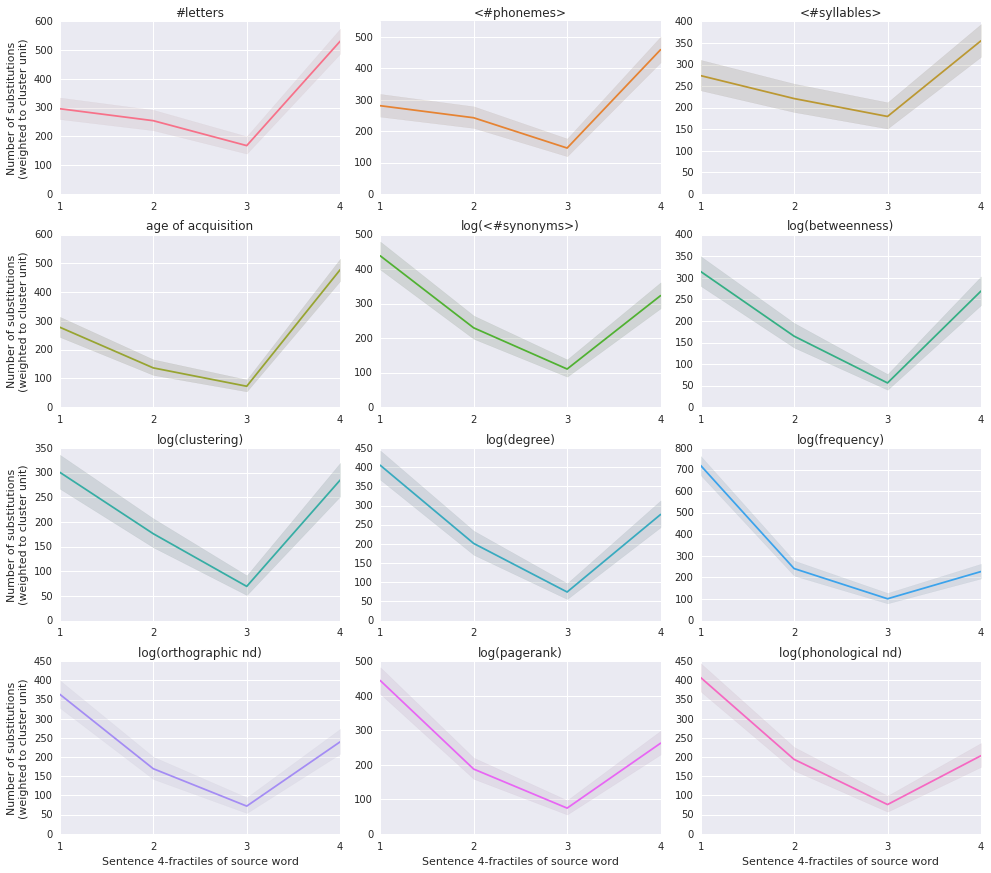

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

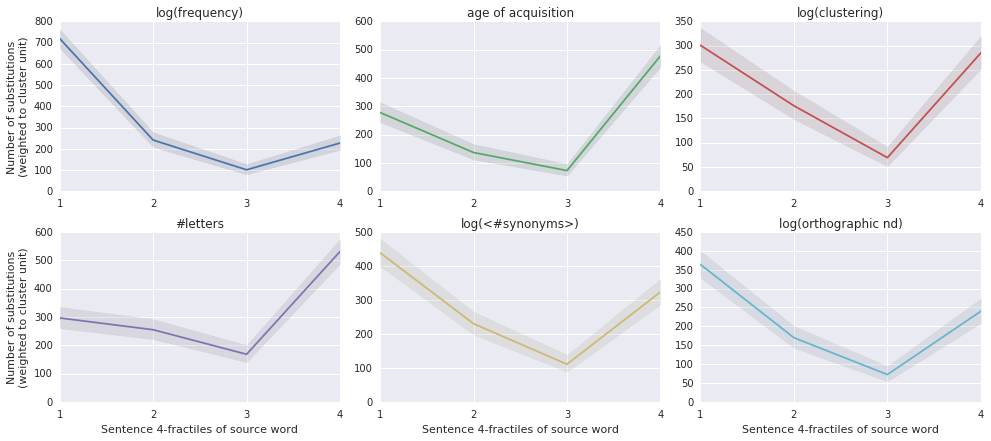

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)